### Decision Boundaries 

Instructor: Nedelina Teneva


Adapted from https://github.com/MIDS-W207/coursework_2022/blob/main/Demos_Bhattacharyya/01%20Tour_de_Classifier.ipynb

In [ ]:
# general
import os
import numpy as np
import pandas as pd

# plots
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# predictions
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [ ]:
def plot_decision_regions(X, y, classifier, plot_test, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface (a discretized mesh)
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
        
    # highlight text examples    
    if plot_test == 1:
        test_idx = range(105, 150)
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')
        

### The below illustrates the decision boundaries for a Logistic Regression model fit to the Iris dataset.

Iris Daset Sheet: https://archive.ics.uci.edu/ml/datasets/iris


### Read data

In [ ]:
# loading the Iris dataset from scikit-learn
iris = datasets.load_iris()
pd.concat((pd.DataFrame(iris.data), pd.DataFrame(iris.target)), 1).head()

<ipython-input-33-d9111be552ec>:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  pd.concat((pd.DataFrame(iris.data), pd.DataFrame(iris.target)), 1).head()


,0,1,2,3,0
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


We will use only two features, the sepal length and petal length.  We will now work with 3 classes; these are converted to integer labels: 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica. 

In [ ]:
X = iris.data[:, [0, 2]]
y = iris.target 
print('Class labels: ', np.unique(y))
print('Length of data:', len(X))

Class labels:  [0 1 2]
Length of data: 150


### Split data into training and test
This is needed to evaluate how well the model performs on unseen data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1, stratify=y)

the train_test_split() already shuffles the training datasets (we want a mix of all classes both in the training and test set). <br>
the stratify parameter creates training and test datasets that have the same proportions of class labels.

In [ ]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


### Feature scalling for optimal performance

We will use the StandardScaler class from scikit-learn's preprocessing module

In [ ]:
sc = StandardScaler()
# estimate the sample mean and standard deviation for each feature in X_train
sc.fit(X_train)

# use the two parameters to standardize both X_train and X_test
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Train and Predict a Logistic Regression Model

We know that this model performs well on linearly separable classs. 

In [ ]:
lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='multinomial')
lr.fit(X_train_std, y_train)

y_pred = lr.predict(X_test_std)
print('Length y_pred: ', len(y_pred))
y_pred

print('Misclassified examples: %d (out of 45)' % (y_test != y_pred).sum())
error = (y_test != y_pred).sum()/len(y_pred)
print('Misclassification error: %.3f' % error)
print('Accuracy: %.3f'% (1-error))

Length y_pred:  45
Misclassified examples: 1 (out of 45)
Misclassification error: 0.022
Accuracy: 0.978


### Visualize the decission boundaries
The Logistic regression seems to be doing a good job separating the red from blue classes but not so well on differentiating the green vs. blue ones. 

<ipython-input-32-4e0b36ef4d6d>:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


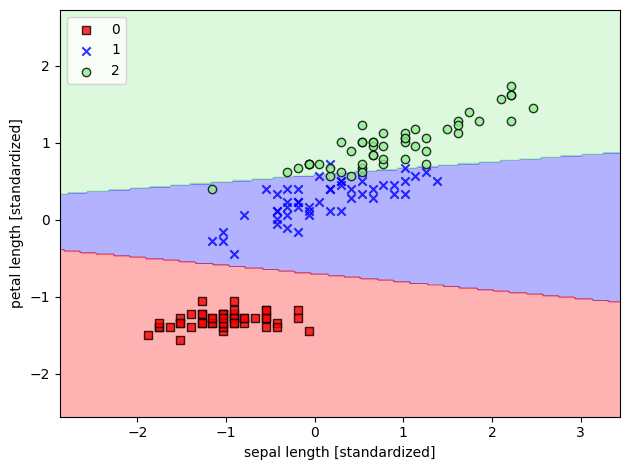

In [ ]:
# combine training and test data
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined,classifier=lr, plot_test=0)
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()